Youssef Cahouach
NIU: 1638618

# EDA DEL PROJECTE NAIVE BAYES

#### Aquest notebook conté l'EDA fet per aquest projecte, el qual afegeix el codi utilitzat per a obtenir les gràfiques que surten a la memoria.

Imports:

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer

from NaiveBayesText import NaiveBayesText

Carreguem el dataset:

In [59]:
dtypesProcessed = {'tweetId': 'int', 'tweetText': 'str', 'tweetDate': 'str', 'sentimentLabel': 'int'}
dfProcessed = pd.read_csv('FinalStemmedSentimentAnalysisDataset.csv', delimiter=';', dtype=dtypesProcessed)
dfProcessed.dropna(inplace=True)
dfProcessed

,tweetId,tweetText,tweetDate,sentimentLabel
0,1,is so sad for my apl friend,04/03/2015,0
1,2,i miss the new moon trail,06/10/2015,0
2,3,omg it already 730 o,03/04/2015,1
3,4,omgag im sooo im gunn cry i've been at thi de...,13/11/2015,0
4,5,i think mi bf is che on me tt,10/08/2015,0
...,...,...,...,...
1564297,1578623,zzzzzz fin night tweet,03/10/2015,1
1564298,1578624,zzzzzzz sleep wel peopl,20/01/2015,1
1564299,1578625,zzzzzzzzzz wait no i hav homework,16/08/2015,0
1564300,1578626,zzzzzzzzzzzzz meh what am i doing up again,03/02/2015,0


Veiem la importancia que té la columna tweetDate sobre el nostre resultat:

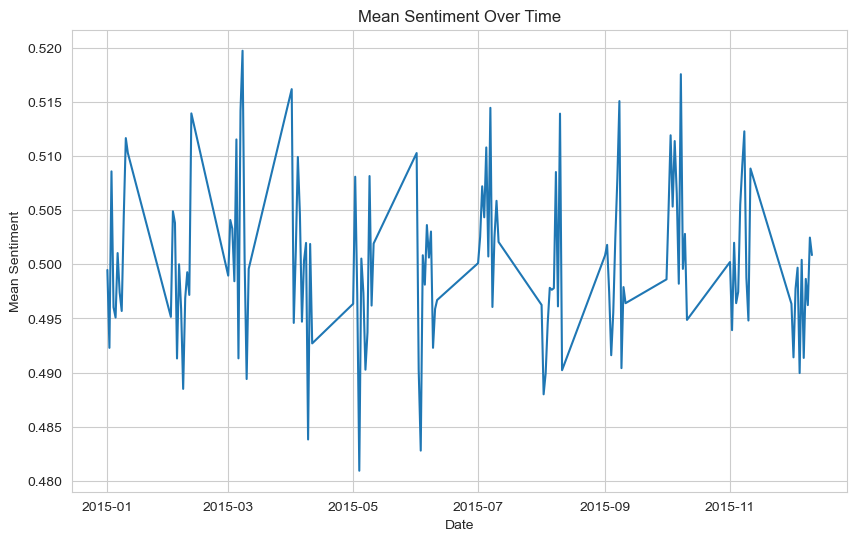

In [60]:
# Convert 'tweetDate' to datetime
dfProcessed['tweetDate'] = pd.to_datetime(dfProcessed['tweetDate'], errors='coerce')

# Group by date and calculate the mean sentiment each day
dfProcessed['tweetDate'] = dfProcessed['tweetDate'].dt.date
mean_sentiment_per_day = dfProcessed.groupby('tweetDate')['sentimentLabel'].mean()

# Plot the mean sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(mean_sentiment_per_day.index, mean_sentiment_per_day.values)
plt.xlabel('Date')
plt.ylabel('Mean Sentiment')
plt.title('Mean Sentiment Over Time')
plt.show()

Veiem si estan balancejades la columna objectiu.

<Axes: xlabel='sentimentLabel', ylabel='count'>

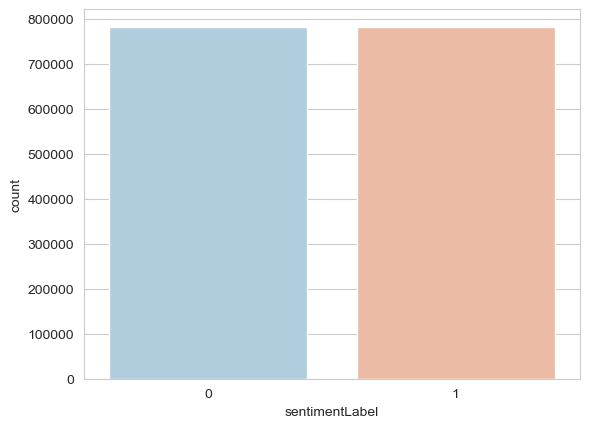

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='sentimentLabel', data=dfProcessed, palette='RdBu_r')

Fem split de dades:

In [62]:
X = dfProcessed['tweetText'].to_numpy()
y = dfProcessed['sentimentLabel'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Comprovem que està balancejat:

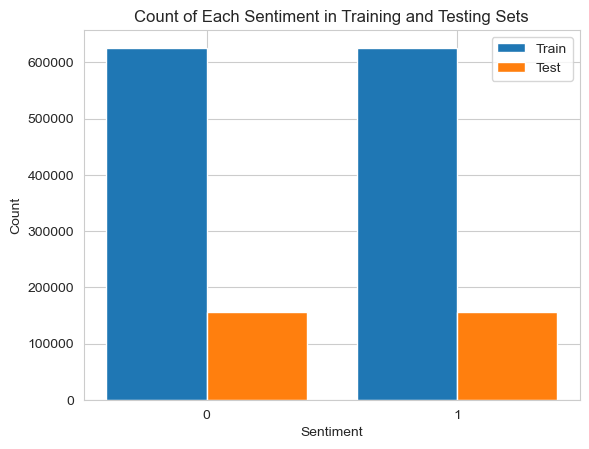

In [63]:
train_counts = np.bincount(y_train)

# Calculate the counts of each sentiment in the testing set
test_counts = np.bincount(y_test)

# Plot the counts
labels = np.unique(np.concatenate([y_train, y_test]))
x = np.arange(len(labels))

plt.bar(x - 0.2, train_counts, 0.4, label='Train')
plt.bar(x + 0.2, test_counts, 0.4, label='Test')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Each Sentiment in Training and Testing Sets')
plt.xticks(x, labels)
plt.legend()

plt.show()


Sentiment 0: 782644 tweets
Sentiment 1: 781636 tweets


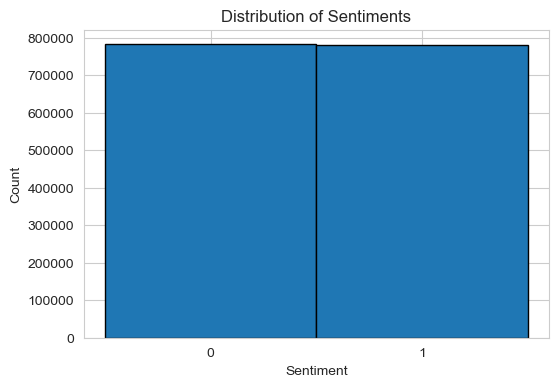

In [66]:
sentiment_counts = np.bincount(y)

for sentiment, count in enumerate(sentiment_counts):
    print(f"Sentiment {sentiment}: {count} tweets")
    
plt.figure(figsize=(6, 4))
plt.hist(y, bins=np.arange(y.min(), y.max()+2) - 0.5, edgecolor='black')
plt.xticks(np.unique(y))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()